In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('dark_background')

In [3]:
plt.style.use('bmh')

In [4]:
df=pd.read_csv('insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
for i in df:
    if df[i].dtypes=='object':
        df[i]=LabelEncoder().fit_transform(df[i])
    else:
        pass
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

<AxesSubplot:xlabel='charges', ylabel='Count'>

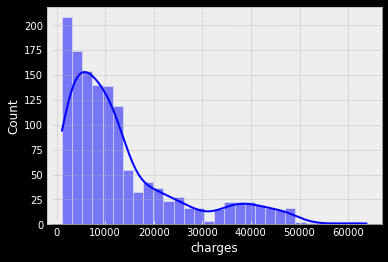

In [11]:
sns.histplot(df.charges, kde=True)

<AxesSubplot:xlabel='charges', ylabel='Count'>

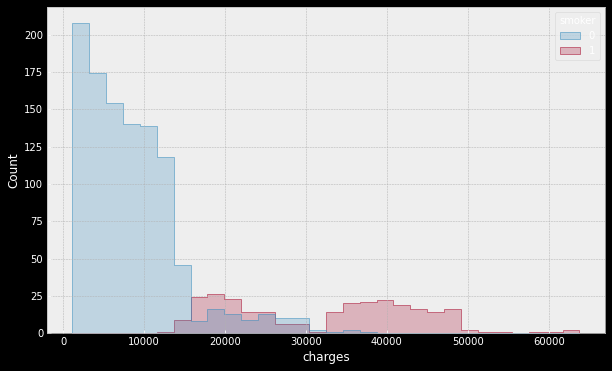

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(x=df.charges, hue=df.smoker, element='step')

<AxesSubplot:xlabel='age', ylabel='Count'>

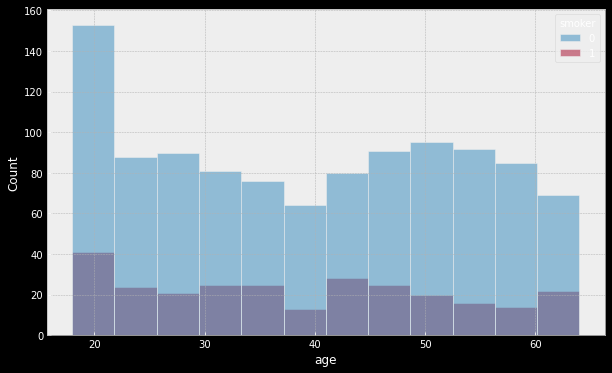

In [13]:
plt.figure(figsize=(10 ,6))
sns.histplot(x=df.age, hue=df.smoker)

<AxesSubplot:xlabel='age', ylabel='charges'>

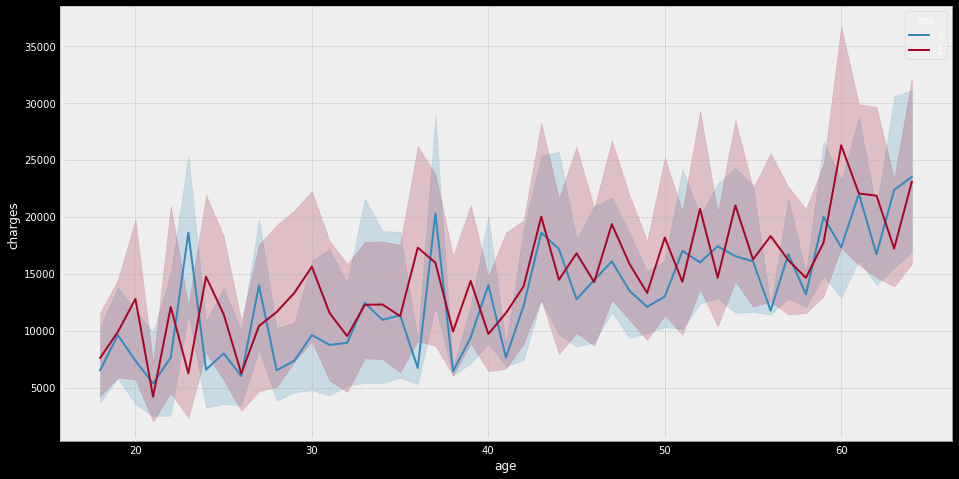

In [14]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='age', y='charges', hue='sex', data=df)

c:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


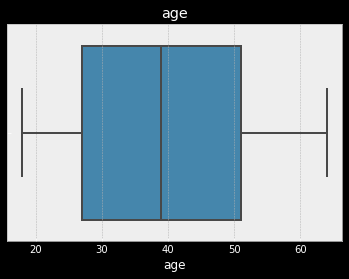

c:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


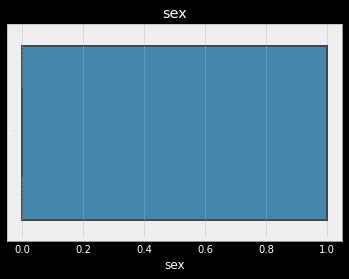

c:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


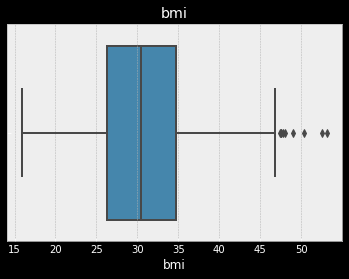

c:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


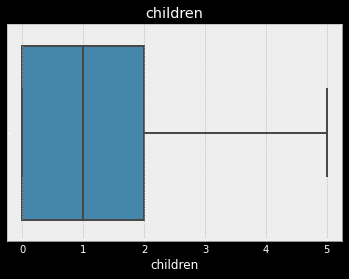

c:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


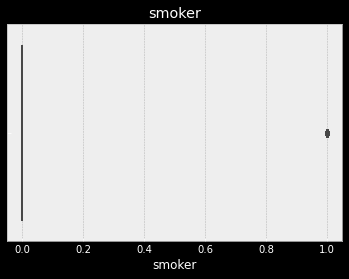

c:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


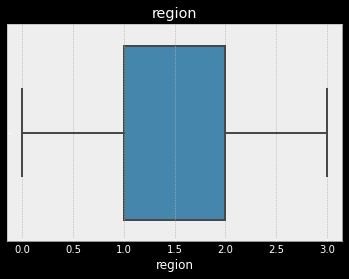

c:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


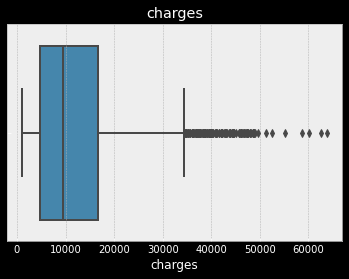

In [15]:
for i in df:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [16]:
q1,q3=np.percentile(df['charges'],[25,75])

In [17]:
print(q1,q3)

4740.28715 16639.912515


In [18]:
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(lower,upper)

-13109.1508975 34489.350562499996


In [19]:
outlier=[]
for i in df['charges']:
    if i>upper:
        outlier.append(i)
    else:
        pass
print(len(outlier))

139


<AxesSubplot:>

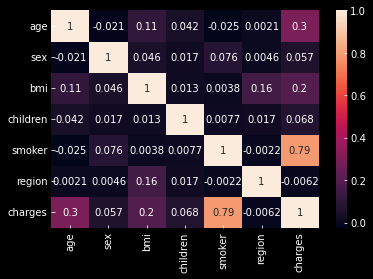

In [20]:
sns.heatmap(df.corr(),annot=True)

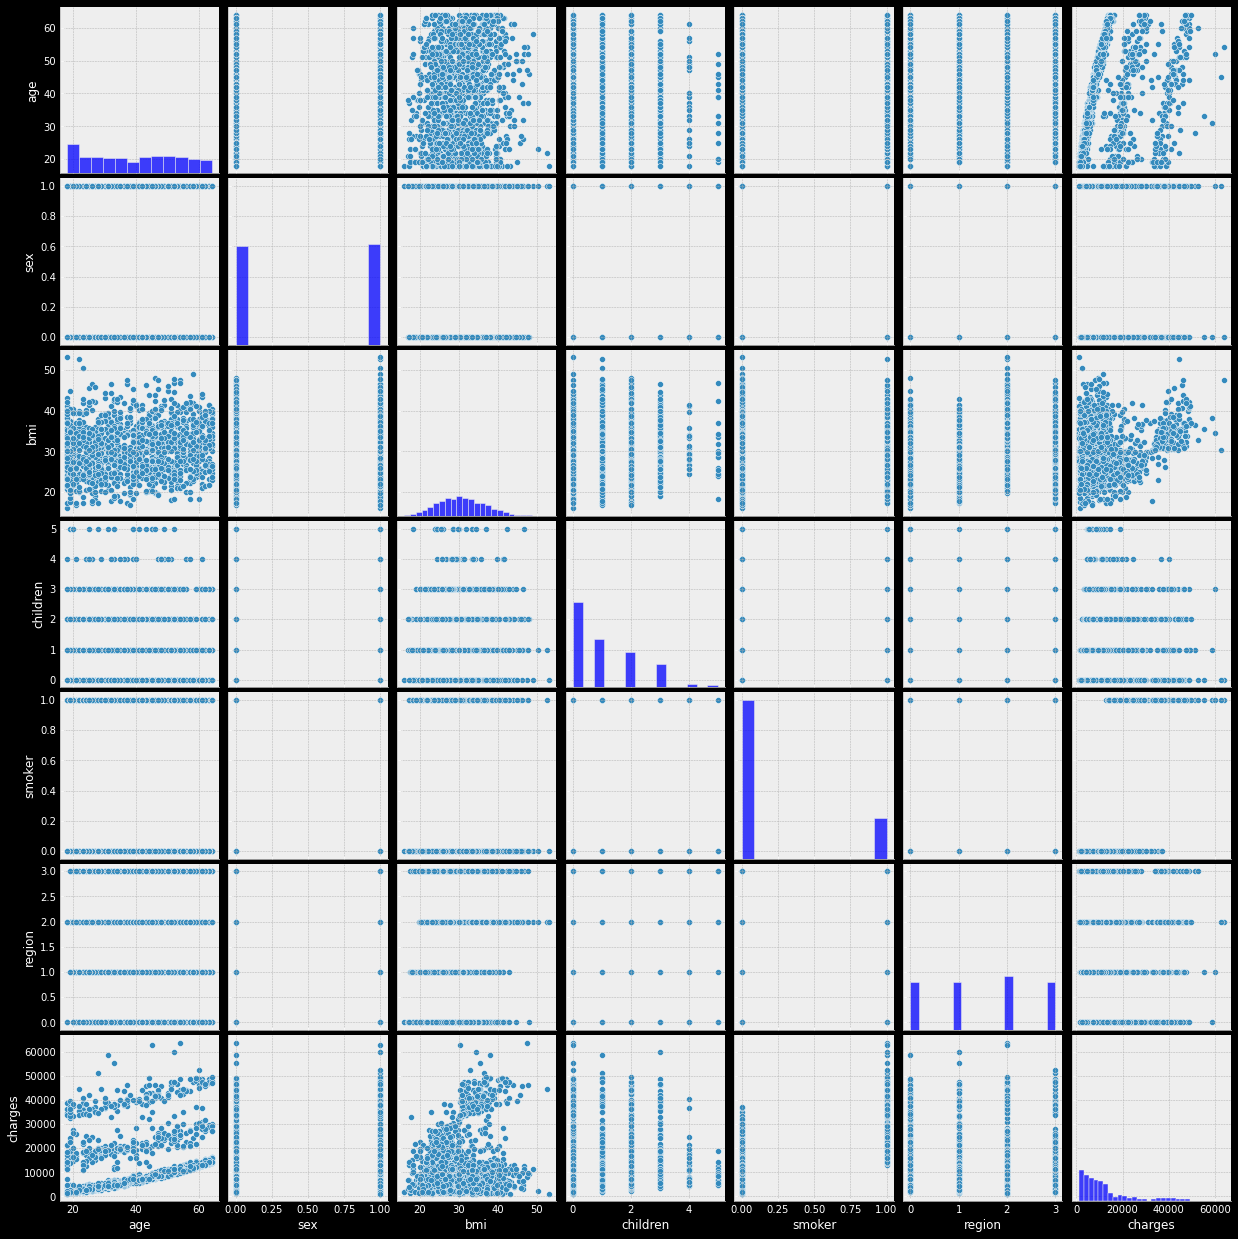

In [21]:
sns.pairplot(df)

In [22]:
x=df.drop('charges',axis=1)
y=df[['charges']]

In [23]:
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.75, random_state=0)

In [24]:
x_train['sex'].nunique()

2

In [25]:
plt.style.use('bmh')

<AxesSubplot:xlabel='age', ylabel='charges'>

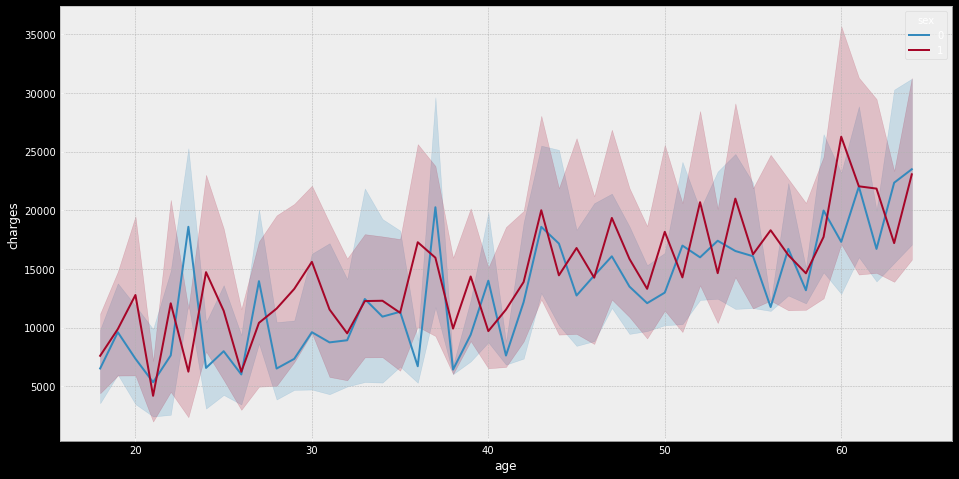

In [26]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='age', y='charges', hue='sex', data=df)

In [27]:
def capping_outlier(data):
    print(data.describe().T)
    for i in data:
        if data[i].nunique()<=2:
            pass
        else:
            q1,q3=np.percentile(data[i],[25,75])
            IQR=q3-q1
            lower=q1-1.5*IQR
            upper=q3+1.5*IQR
            data[i]=np.where(data[i]>upper,upper,np.where(data[i]<lower,lower,data[i]))
    print(data.describe().T)


In [28]:
capping_outlier(x_train)

           count       mean        std    min      25%   50%   75%    max
age       1003.0  39.235294  14.060124  18.00  26.5000  39.0  51.0  64.00
sex       1003.0   0.492522   0.500193   0.00   0.0000   0.0   1.0   1.00
bmi       1003.0  30.719766   6.233512  15.96  26.3025  30.3  34.8  53.13
children  1003.0   1.076770   1.207548   0.00   0.0000   1.0   2.0   5.00
smoker    1003.0   0.202393   0.401984   0.00   0.0000   0.0   0.0   1.00
region    1003.0   1.568295   1.105273   0.00   1.0000   2.0   3.0   3.00
           count       mean        std    min      25%   50%   75%       max
age       1003.0  39.235294  14.060124  18.00  26.5000  39.0  51.0  64.00000
sex       1003.0   0.492522   0.500193   0.00   0.0000   0.0   1.0   1.00000
bmi       1003.0  30.704077   6.185539  15.96  26.3025  30.3  34.8  47.54625
children  1003.0   1.076770   1.207548   0.00   0.0000   1.0   2.0   5.00000
smoker    1003.0   0.202393   0.401984   0.00   0.0000   0.0   0.0   1.00000
region    1003.0   1

In [29]:
capping_outlier(y_train)

          count          mean           std        min         25%        50%  \
charges  1003.0  13215.863224  11959.751829  1121.8739  4772.81215  9504.3103   

                 75%          max  
charges  16717.01075  63770.42801  
          count          mean           std        min         25%        50%  \
charges  1003.0  12492.648602  10145.091681  1121.8739  4772.81215  9504.3103   

                 75%          max  
charges  16717.01075  34633.30865  


In [30]:
lr=LinearRegression().fit(x_train,y_train)

In [31]:
y_pred=lr.predict(x_test)

In [32]:
x_train_cons=sm.add_constant(x_train)

In [33]:
model=sm.OLS(y_train,x_train_cons).fit()

In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     454.6
Date:                Wed, 27 Jul 2022   Prob (F-statistic):          4.26e-281
Time:                        15:03:06   Log-Likelihood:                -10014.
No. Observations:                1003   AIC:                         2.004e+04
Df Residuals:                     996   BIC:                         2.008e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7030.3276    952.834     -7.378      0.0

In [35]:
from sklearn.metrics import r2_score, adjusted_mutual_info_score

In [36]:
r2_score(y_test,y_pred)

0.7649277545026708

In [37]:
lr.score(x_train,y_train)

0.7325055553119191

In [38]:
lr.score(x_test,y_test)

0.7649277545026708

In [43]:
from xgboost import XGBRegressor

xg=XGBRegressor(n_estimators=500,max_dep=10,cv=5,eta=0.2, random_state=0).fit(x_train,y_train)

y_pred_xg=xg.predict(x_test)

r2_score(y_test,y_pred_xg)


[15:08:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "cv", "max_dep" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.7983063364571665